In [1]:
import random
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, ConnectionPatch, Arrow
from queue import PriorityQueue as pq
from time import time as T

### Basic implementation of a weighted, directed graph.

In [2]:
class WeightedDirectedGraph:
    def __init__(self):
        self.G = {} # adjacency list representation
        self.w = {} # edges weights
        self.p = {} # holds positions for rendering
        
    def add_vertex(self, a, pos):
        self.G[a] = [] # empty adjacency list
        self.p[a] = pos # set the position for rendering
        
    def add_edge(self, a, b, c):
        self.G[a].append(b) # add to adjacency list
        self.w[(a, b)] = c  # add weight for edge
        
    def overlay_path(self, p):
        # this function overlays a path p onto the graph
        fig, ax = plt.subplots(figsize=(10, 10))
        ax.axis('equal')
        ax.set_xticks([]), ax.set_yticks([])
        
        ax.set_xlim(-1, 11)
        ax.set_ylim(-1, 11)
        
        # add vertices
        for name, pos in self.p.items():
            c = Circle(pos, 0.3, zorder=20, color=(0, 0, 0))
            ax.annotate(name, fontsize=10, xy=pos, xytext=(pos[0]+0, pos[1]-0.1), color=(1, 1, 1), ha='center', zorder=21)
            ax.add_artist(c)
            
        # add edges
        mw = abs(min(self.w.values())) + abs(max(self.w.values()))
        for e, w in self.w.items():
            # ignore edges not in path
            if e not in p:
                continue
            
            a, b = e
            shade = abs(w/mw)
            
            if w > 0:
                color = (shade, 0, 0)
            else:
                color = (0, 0, shade)
            l = ConnectionPatch(self.p[a], self.p[b], 'data', color=color)
            ax.add_artist(l)
            
        plt.close()
        return fig
    
    def viz(self):
        # visualization for the graph
        # red = positive weights
        # blue = negative weights
        # shade of color = magnitude of weight
        fig, ax = plt.subplots(figsize=(10, 10))
        ax.axis('equal')
        ax.set_xticks([]), ax.set_yticks([])
        
        ax.set_xlim(-1, 11)
        ax.set_ylim(-1, 11)
        
        # add vertices
        for name, pos in self.p.items():
            c = Circle(pos, 0.3, zorder=20, color=(0, 0, 0))
            ax.annotate(name, fontsize=10, xy=pos, xytext=(pos[0]+0, pos[1]-0.1), color=(1, 1, 1), ha='center', zorder=21)
            ax.add_artist(c)
            
        # add edges
        mw = abs(min(self.w.values())) + abs(max(self.w.values()))
        for e, w in self.w.items():
            a, b = e
            shade = abs(w/mw)
            
            if w > 0:
                color = (shade, 0, 0)
            else:
                color = (0, 0, shade)
            l = ConnectionPatch(self.p[a], self.p[b], 'data', color=color)
            ax.add_artist(l)
            
        plt.close()
        return fig
    
    # the length of a graph is the number of vertices
    def __len__(self):
        return len(self.G.keys())


### Dijkstra's Algorithm for Single Source Shortest Path

In [3]:
def dijkstra(g, source='0'):
    dist = {}
    prev = {}
    Q = pq()
    
    for v in g.G.keys():
        dist[v] = float('inf')
        prev[v] = None
        Q.put((dist[v], v))
        
    dist[source] = 0
        
    while not Q.empty():
        u = Q.get()[1]
        
        for v in g.G[u]:
            alt = dist[u] + g.w[(u, v)]
            if alt < dist[v]:
                dist[v] = alt
                prev[v] = u
                Q.put((dist[v], v))
    
    return dist, prev

### Bellman-Ford Algorithm for Single Source Shortest Path

In [4]:
def bellmanford(g, source='0'):
    dist = {}
    prev = {}
    
    for v in g.G.keys():
        dist[v] = float('inf')
        prev[v] = None
        
    dist[source] = 0
        
    for i in range(1, len(g)):
        for e, w in g.w.items():
            u, v = e
            if dist[u] + w < dist[v]:
                dist[v] = dist[u] + w
                prev[v] = u
    
    return dist, prev

### Utility function to print results

In [5]:
def print_results(d, p):
    print('     Vertex     Distance from Source    Parent')
    for n in sorted(d.keys()):
        print(f'        {n}                {d[n]}               {p[n] if p[n] is not None else " "}')

### Just a generator function to make random graphs. 

In [6]:
def generate_WeightedDirectedGraph(n, negative=False):
    g = WeightedDirectedGraph()
    # add all the vertices in random locations
    for i in range(n):
        name = str(i)
        pos = (random.random()*10, random.random()*10)
        g.add_vertex(name, pos)
        
    # add a random number of edges for each vertex with random weights   
    for j in range(n):
        weight = random.randint(-10 if negative else 1, 10)
        while weight == 0:
            weight = random.randint(-10 if negative else 1, 10)
        
        
        nedges = max(1, int(random.randint(0, n)/2))
        k = set([str(random.randint(0, n-1)) for _ in range(nedges)])
        
        for v2 in k:
            if v2 != str(j) and (str(j), v2) not in g.w:
                g.add_edge(str(j), v2, weight)

    return g

### Some example graphs that I made.

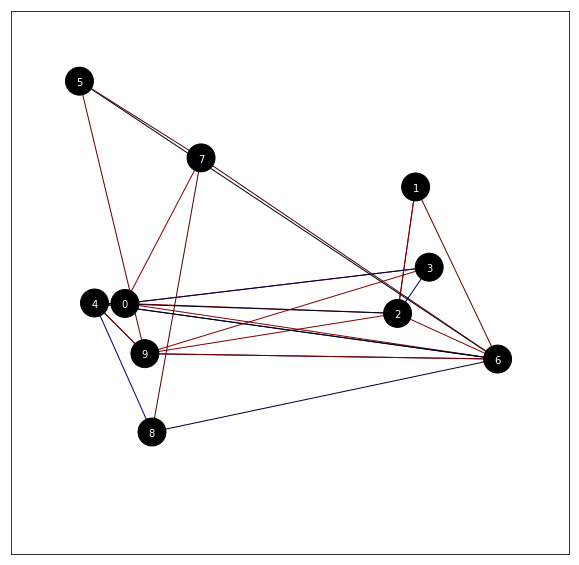

In [7]:
random.seed(100)
g = generate_WeightedDirectedGraph(10, negative=True)
g.viz()

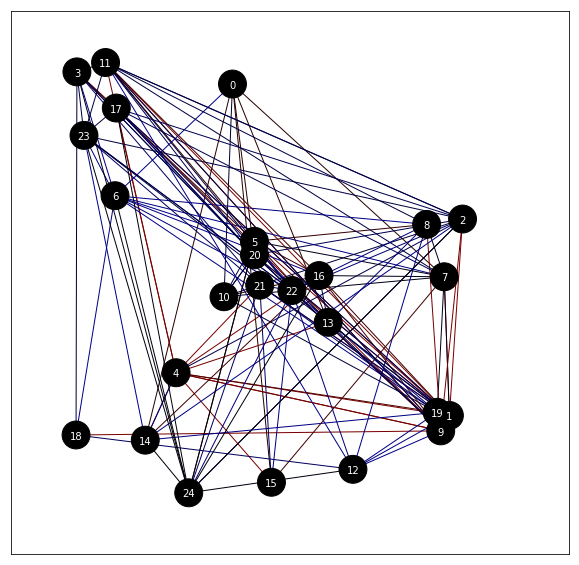

In [8]:
random.seed(25)
g = generate_WeightedDirectedGraph(25, negative=True)
g.viz()

# Example / Test Case (Source: [link](https://www.geeksforgeeks.org/dials-algorithm-optimized-dijkstra-for-small-range-weights/))

![](external_test.png)

```
Input : Source = 0
Output : 
     Vertex   Distance from Source
        0                0
        1                4
        2                12
        3                19
        4                21
        5                11
        6                9
        7                8
        8                14
```


### Constructing this graph with my Visualization

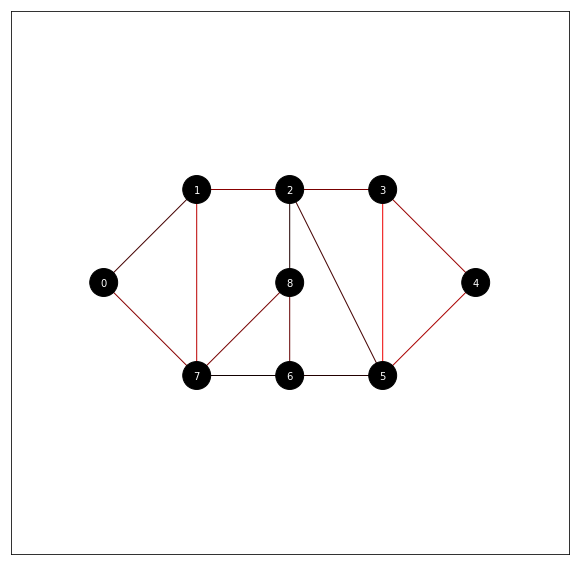

In [9]:
g = WeightedDirectedGraph()

g.add_vertex('0', (1, 5))
g.add_vertex('1', (3, 7))
g.add_vertex('7', (3, 3))
g.add_vertex('2', (5, 7))
g.add_vertex('8', (5, 5))
g.add_vertex('6', (5, 3))
g.add_vertex('3', (7, 7))
g.add_vertex('5', (7, 3))
g.add_vertex('4', (9, 5))

g.add_edge('0', '1', 4)
g.add_edge('0', '7', 8)
g.add_edge('1', '2', 8)
g.add_edge('1', '7', 11)
g.add_edge('7', '8', 7)
g.add_edge('7', '6', 1)
g.add_edge('2', '8', 2)
g.add_edge('2', '3', 7)
g.add_edge('2', '5', 4)
g.add_edge('8', '6', 6)
g.add_edge('6', '5', 2)
g.add_edge('3', '4', 9)
g.add_edge('5', '4', 10)
g.add_edge('3', '5', 14)
g.add_edge('3', '4', 9)

f = g.viz()
f.savefig('testcase.png')
f

### Running Dijkstra's and Outputting Results

In [10]:
d, p = dijkstra(g)
print_results(d, p)

     Vertex     Distance from Source    Parent
        0                0                
        1                4               0
        2                12               1
        3                19               2
        4                21               5
        5                11               6
        6                9               7
        7                8               0
        8                14               2


### That's nice but what if I wanted the shortest path from A to B in my graph?

In [11]:
def shortest_path_dijkstra(g, source, target):
    dist, prev = dijkstra(g, source)
    k = []
    v2 = target
    v1 = prev[target]
    while v1 != None:
        k.append((v1, v2))
        v2 = v1
        v1 = prev[v1]
    return list(reversed(k))
p = shortest_path_dijkstra(g, '0', '4')
print(p)

[('0', '7'), ('7', '6'), ('6', '5'), ('5', '4')]


### Overlaying the shortest path using my Visualization API

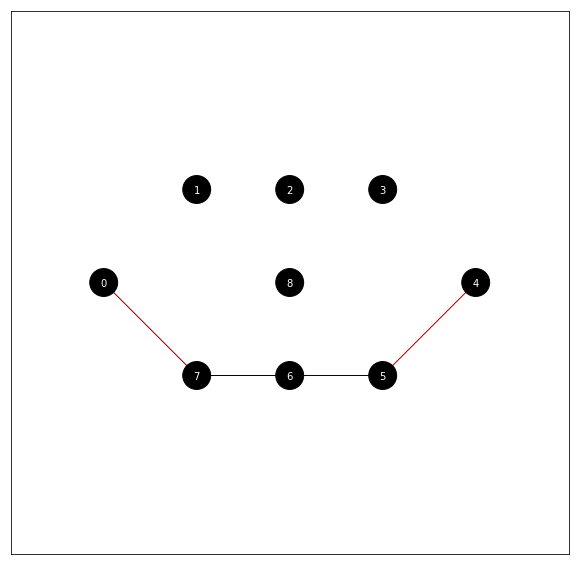

In [12]:
f = g.overlay_path(p)
f.savefig('dijkstra_shortest.png')
f

### Running Bellman-Ford's and Outputting Results

In [13]:
d, p = bellmanford(g)
print_results(d, p)

     Vertex     Distance from Source    Parent
        0                0                
        1                4               0
        2                12               1
        3                19               2
        4                21               5
        5                11               6
        6                9               7
        7                8               0
        8                14               2


### That's nice but what if I wanted the shortest path from A to B in my graph?

In [14]:
def shortest_path_bellmanford(g, source, target):
    dist, prev = bellmanford(g, source)
    k = []
    v2 = target
    v1 = prev[target]
    while v1 != None:
        k.append((v1, v2))
        v2 = v1
        v1 = prev[v1]
    return list(reversed(k))
p = shortest_path_bellmanford(g, '0', '4')
print(p)

[('0', '7'), ('7', '6'), ('6', '5'), ('5', '4')]


### Overlaying the shortest path using my Visualization API

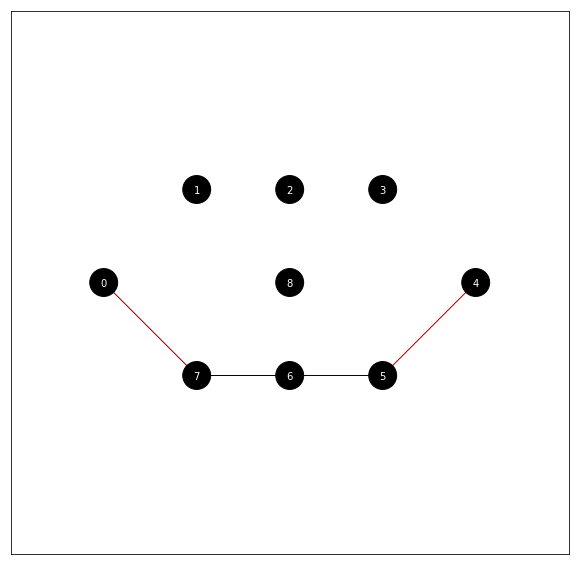

In [15]:
f = g.overlay_path(p)
f.savefig('bellmanford_shortest.png')
f

## On larger graphs.

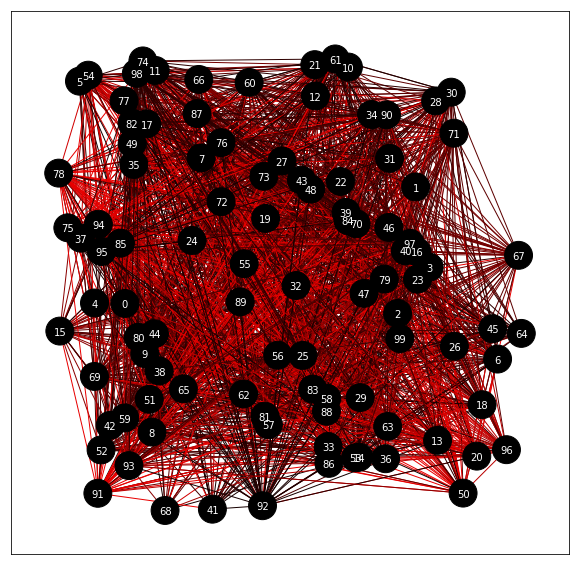

In [16]:
random.seed(100)
g = generate_WeightedDirectedGraph(100)
g.viz()

In [17]:
# have to search from 3 since its not possible to go back
start = T()
d, p = dijkstra(g, '3')
print(f'Runtime {T()-start}')
# print_results(d, p)

Runtime 0.0026340484619140625


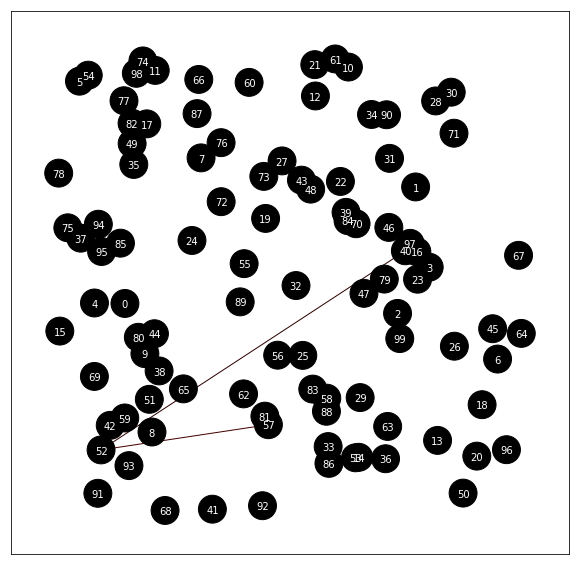

In [18]:
p = shortest_path_bellmanford(g, '3', '57')
g.overlay_path(p)

In [19]:
# have to search from 3 since its not possible to go back
start = T()
d, p = bellmanford(g, '3')
print(f'Runtime {T()-start}')
# print_results(d, p)

Runtime 0.02869892120361328


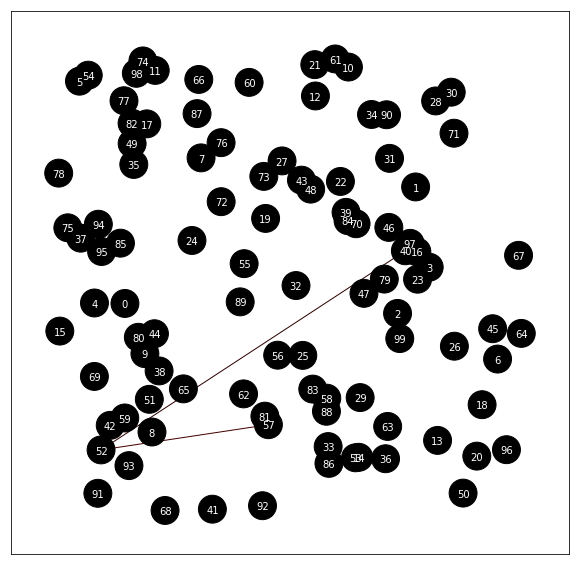

In [20]:
p = shortest_path_bellmanford(g, '3', '57')
g.overlay_path(p)

## Conclusion / Remarks

I should've probably tested this stuff more. Also I realize that the visualization is lacking arrows for a directed graph, but I don't have time to implement it.

Also, I think if I'm getting the same results from Dijkstra and Bellman-Ford, my implementations are probably both correct or both wrong.

There's also some issues with my generate_WeightedDirectedGraph function. The graph is too connected, so I can't get cool-looking overlays. I need to probably weight connections spatially so vertices that are farther apart are less likely to be connected.

That's sort of disappointing, but I still get the same results with Bellman-Ford and Dijkstra.

<details> 
  <summary>Note: </summary>
    Please give full points.
</details>